In [2]:
pip install tensorflow_decision_forests

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 49.9 MB/s eta 0:00:00


In [3]:
pip install wurlitzer

In [4]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import math

import tensorflow_decision_forests as tfdf

from IPython.core.magic import register_line_magic
from IPython.display import Javascript

try:
  from wurlitzer import sys_pipes
except:
  from colabtools.googlelog import CaptureLog as sys_pipesЧЧ



In [5]:
print("Found TensorFlow Decision Forests v" + tfdf.__version__)

Found TensorFlow Decision Forests v1.7.0


In [6]:

!wget -q https://storage.googleapis.com/download.tensorflow.org/data/palmer_penguins/penguins.csv -O /tmp/penguins.csv

dataset = pd.read_csv("/tmp/penguins.csv")

dataset.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,female,2007
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,male,2007
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN,2007
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN,2007


In [7]:
label = "species"

classes = dataset[label].unique().tolist()

print(f"Заголовки класів: {classes}")

dataset[label] = dataset[label].map(classes.index)

Заголовки класів: ['Adelie', 'Gentoo', 'Chinstrap']


In [8]:
def splitDataset(dataset, testRatio=0.30):
  testIndices = np.random.rand(len(dataset)) < testRatio
  return dataset[~testIndices], dataset[testIndices]


trainDataset, testDataset = splitDataset(dataset)
print("{} даних для навчання, {} даних для тестування.".format(
    len(trainDataset), len(testDataset)))

221 даних для навчання, 123 даних для тестування.


In [11]:
train = tfdf.keras.pd_dataframe_to_tf_dataset(trainDataset, label=label)
test = tfdf.keras.pd_dataframe_to_tf_dataset(testDataset, label=label)

In [12]:

model = tfdf.keras.RandomForestModel()

model.compile(
    metrics=["accuracy"])

with sys_pipes():
  model.fit(x=train)

Use /tmp/tmp1mfsawvr as temporary training directory
Reading training dataset...
Training dataset read in 0:00:06.657736. Found 221 examples.
Training model...


[INFO 23-11-12 15:37:03.7251 UTC kernel.cc:1233] Loading model from path /tmp/tmp1mfsawvr/model/ with prefix 24a9e778b9194410
[INFO 23-11-12 15:37:03.7416 UTC decision_forest.cc:660] Model loaded with 300 root(s), 4230 node(s), and 7 input feature(s).
[INFO 23-11-12 15:37:03.7448 UTC abstract_model.cc:1343] Engine "RandomForestGeneric" built
[INFO 23-11-12 15:37:03.7448 UTC kernel.cc:1061] Use fast generic engine


Model trained in 0:00:00.110008
Compiling model...
Model compiled.


In [13]:
evaluation = model.evaluate(test, return_dict=True)

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

1/1 [==============================] - 0s 375ms/step - loss: 0.0000e+00 - accuracy: 0.9919
loss: 0.0000
accuracy: 0.9919


In [15]:
model.save("/tmp/savedModel")

In [17]:
tfdf.model_plotter.plot_model_in_colab(model, tree_idx=0, max_depth=4)

In [18]:
model.summary()

Model: "random_forest_model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1 (1.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 1 (1.00 Byte)
_________________________________________________________________
Type: "RANDOM_FOREST"
Task: CLASSIFICATION
Label: "__LABEL"

Input Features (7):
	bill_depth_mm
	bill_length_mm
	body_mass_g
	flipper_length_mm
	island
	sex
	year

No weights

Variable Importance: INV_MEAN_MIN_DEPTH:
    1.    "bill_length_mm"  0.460169 ################
    2. "flipper_length_mm"  0.431124 #############
    3.     "bill_depth_mm"  0.322000 #####
    4.            "island"  0.295604 ###
    5.       "body_mass_g"  0.268499 #
    6.               "sex"  0.241938 
    7.              "year"  0.241172 

Variable Importance: NUM_AS_ROOT:
    1. "flipper_length_mm" 149.000000 ################
    2.    "bill_length_mm" 92.000000 #########
    3.     "bill_

In [19]:
model.make_inspector().evaluation()

Evaluation(num_examples=221, accuracy=0.9502262443438914, loss=0.11361364477495263, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)

In [20]:
model.make_inspector().training_logs()

[TrainLog(num_trees=1, evaluation=Evaluation(num_examples=83, accuracy=0.927710843373494, loss=2.605565174516425, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)),
 TrainLog(num_trees=11, evaluation=Evaluation(num_examples=221, accuracy=0.9502262443438914, loss=0.4078903039790926, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)),
 TrainLog(num_trees=21, evaluation=Evaluation(num_examples=221, accuracy=0.9592760180995475, loss=0.2526942811130938, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)),
 TrainLog(num_trees=31, evaluation=Evaluation(num_examples=221, accuracy=0.9592760180995475, loss=0.10553548141167714, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)),
 TrainLog(num_trees=41, evaluation=Evaluation(num_examples=221, accuracy=0.9638009049773756, loss=0.10486511065207456, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)),
 TrainLog(num_trees=51, evaluation=Evaluation(num_examples=221, accuracy=0.9547511312217195, loss=0.10546763534594446, rmse=Non

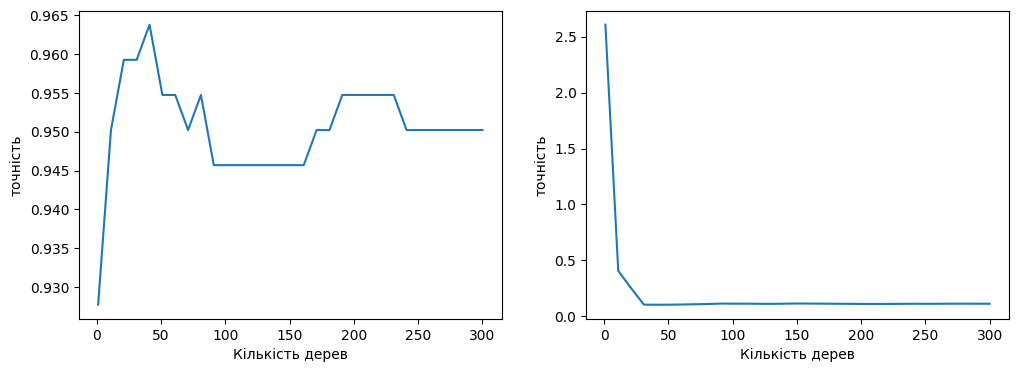

In [22]:
import matplotlib.pyplot as plt

logs = model.make_inspector().training_logs()

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Кількість дерев")
plt.ylabel("точність")

plt.subplot(1, 2, 2)
plt.plot([log.num_trees for log in logs], [log.evaluation.loss for log in logs])
plt.xlabel("Кількість дерев")
plt.ylabel("точність")

plt.show()

In [23]:
tfdf.keras.get_all_models()

[tensorflow_decision_forests.keras.RandomForestModel,
 tensorflow_decision_forests.keras.GradientBoostedTreesModel,
 tensorflow_decision_forests.keras.CartModel,
 tensorflow_decision_forests.keras.DistributedGradientBoostedTreesModel]

In [24]:
feature1 = tfdf.keras.FeatureUsage(name="bill_length_mm")
feature2 = tfdf.keras.FeatureUsage(name="island")

allFeatures = [feature1, feature2]

model2 = tfdf.keras.GradientBoostedTreesModel(
    features=allFeatures, exclude_non_specified_features=True)

model2.compile(metrics=["accuracy"])
model2.fit(x=train, validation_data=test)

print(model2.evaluate(test, return_dict=True))

Use /tmp/tmp_umpzw5a as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.158165. Found 221 examples.
Reading validation dataset...
Num validation examples: tf.Tensor(123, shape=(), dtype=int32)
Validation dataset read in 0:00:00.225643. Found 123 examples.
Training model...
Model trained in 0:00:00.113747
Compiling model...
Model compiled.
1/1 [==============================] - 0s 92ms/step - loss: 0.0000e+00 - accuracy: 0.9268
{'loss': 0.0, 'accuracy': 0.9268292784690857}


In [28]:
feature1 = tfdf.keras.FeatureUsage(name="year", semantic=tfdf.keras.FeatureSemantic.CATEGORICAL)
feature2 = tfdf.keras.FeatureUsage(name="bill_length_mm")
feature3 = tfdf.keras.FeatureUsage(name="sex")
allDeatures = [feature1, feature2, feature3]

model3 = tfdf.keras.GradientBoostedTreesModel(features=allFeatures, exclude_non_specified_features=True)
model3.compile( metrics=["accuracy"])

with sys_pipes():
  model3.fit(x=train, validation_data=test)


Use /tmp/tmpg_ainlde as temporary training directory
Reading training dataset...


Training dataset read in 0:00:00.789218. Found 221 examples.
Reading validation dataset...


Num validation examples: tf.Tensor(123, shape=(), dtype=int32)
Validation dataset read in 0:00:00.851609. Found 123 examples.
Training model...


[INFO 23-11-12 16:33:09.9291 UTC kernel.cc:1233] Loading model from path /tmp/tmpg_ainlde/model/ with prefix 02d3a7358aa74638
[INFO 23-11-12 16:33:09.9490 UTC decision_forest.cc:660] Model loaded with 66 root(s), 2064 node(s), and 2 input feature(s).
[INFO 23-11-12 16:33:09.9491 UTC abstract_model.cc:1343] Engine "GradientBoostedTreesGeneric" built
[INFO 23-11-12 16:33:09.9491 UTC kernel.cc:1061] Use fast generic engine


Model trained in 0:00:00.831785
Compiling model...


Model compiled.


In [31]:
model4 = tfdf.keras.GradientBoostedTreesModel(
    num_trees=500, growing_strategy="BEST_FIRST_GLOBAL", max_depth=8)

model4.fit(x=train)

model4.summary()

Use /tmp/tmpxvuui7ny as temporary training directory
Reading training dataset...
Training dataset read in 0:00:01.205357. Found 221 examples.
Training model...
Model trained in 0:00:00.422863
Compiling model...
Model compiled.
Model: "gradient_boosted_trees_model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1 (1.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 1 (1.00 Byte)
_________________________________________________________________
Type: "GRADIENT_BOOSTED_TREES"
Task: CLASSIFICATION
Label: "__LABEL"

Input Features (7):
	bill_depth_mm
	bill_length_mm
	body_mass_g
	flipper_length_mm
	island
	sex
	year

No weights

Variable Importance: INV_MEAN_MIN_DEPTH:
    1.    "bill_length_mm"  0.399244 ################
    2.     "bill_depth_mm"  0.305998 #########
    3. "flipper_length_mm"  0.256822 ######
    4.            "island"  0.228876 ####
    5.       "body_mass_g"

In [32]:
model5 = tfdf.keras.GradientBoostedTreesModel(
    num_trees=500,
    growing_strategy="BEST_FIRST_GLOBAL",
    max_depth=8,
    split_axis="SPARSE_OBLIQUE",
    categorical_algorithm="RANDOM",
    )

model5.fit(x=train)

model5.summary()

Use /tmp/tmp3km4wg21 as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.199315. Found 221 examples.
Training model...
Model trained in 0:00:00.512618
Compiling model...
Model compiled.


Model: "gradient_boosted_trees_model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1 (1.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 1 (1.00 Byte)
_________________________________________________________________
Type: "GRADIENT_BOOSTED_TREES"
Task: CLASSIFICATION
Label: "__LABEL"

Input Features (7):
	bill_depth_mm
	bill_length_mm
	body_mass_g
	flipper_length_mm
	island
	sex
	year

No weights

Variable Importance: INV_MEAN_MIN_DEPTH:
    1.     "bill_depth_mm"  0.481062 ################
    2.    "bill_length_mm"  0.322491 ########
    3.            "island"  0.214428 ##
    4. "flipper_length_mm"  0.193335 #
    5.       "body_mass_g"  0.167296 
    6.              "year"  0.155458 
    7.               "sex"  0.155145 

Variable Importance: NUM_AS_ROOT:
    1.     "bill_depth_mm" 26.000000 ################
    2.            "island" 18.000000 #########
    3.    "

In [36]:
!wget -q https://storage.googleapis.com/download.tensorflow.org/data/abalone_raw.csv -O /tmp/abalone.csv

datasetReg = pd.read_csv("/tmp/abalone.csv")

print(datasetReg.head(10))


  Type  LongestShell  Diameter  Height  WholeWeight  ShuckedWeight  \
0    M         0.455     0.365   0.095       0.5140         0.2245   
1    M         0.350     0.265   0.090       0.2255         0.0995   
2    F         0.530     0.420   0.135       0.6770         0.2565   
3    M         0.440     0.365   0.125       0.5160         0.2155   
4    I         0.330     0.255   0.080       0.2050         0.0895   
5    I         0.425     0.300   0.095       0.3515         0.1410   
6    F         0.530     0.415   0.150       0.7775         0.2370   
7    F         0.545     0.425   0.125       0.7680         0.2940   
8    M         0.475     0.370   0.125       0.5095         0.2165   
9    F         0.550     0.440   0.150       0.8945         0.3145   

   VisceraWeight  ShellWeight  Rings  
0         0.1010        0.150     15  
1         0.0485        0.070      7  
2         0.1415        0.210      9  
3         0.1140        0.155     10  
4         0.0395        0.055     

In [38]:

trainPandas, testPandas = splitDataset(datasetReg)
print("{} даних для навчання, {} даних для тестування.".format(
    len(trainPandas), len(testPandas)))

label = "Rings"

trainReg = tfdf.keras.pd_dataframe_to_tf_dataset(trainPandas, label=label, task=tfdf.keras.Task.REGRESSION)
testReg = tfdf.keras.pd_dataframe_to_tf_dataset(testPandas, label=label, task=tfdf.keras.Task.REGRESSION)

2890 даних для навчання, 1287 даних для тестування.


In [39]:

modelReg = tfdf.keras.RandomForestModel(task = tfdf.keras.Task.REGRESSION)

modelReg.compile(metrics=["mse"])

with sys_pipes():
  modelReg.fit(x=trainReg)

Use /tmp/tmppcizv1lb as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.376225. Found 2890 examples.
Training model...


[INFO 23-11-12 16:50:38.0356 UTC kernel.cc:1233] Loading model from path /tmp/tmppcizv1lb/model/ with prefix b6311322f7804d9c
[INFO 23-11-12 16:50:38.5720 UTC decision_forest.cc:660] Model loaded with 300 root(s), 258104 node(s), and 8 input feature(s).
[INFO 23-11-12 16:50:38.5720 UTC abstract_model.cc:1343] Engine "RandomForestOptPred" built
[INFO 23-11-12 16:50:38.5720 UTC kernel.cc:1061] Use fast generic engine


Model trained in 0:00:03.802178
Compiling model...
Model compiled.


In [40]:

evaluation = modelReg.evaluate(testReg, return_dict=True)

print(evaluation)
print(f"Середньоквадратична похибка: {evaluation['mse']}")
print(f"Корінь середньоквадратичної0 похибки: {math.sqrt(evaluation['mse'])}")

2/2 [==============================] - 0s 21ms/step - loss: 0.0000e+00 - mse: 4.9106
{'loss': 0.0, 'mse': 4.910555362701416}
Середньоквадратична похибка: 4.910555362701416
Корінь середньоквадратичної0 похибки: 2.215977292911959
